In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_parquet('/content/dados_dia_2.parquet')
dados.head(2)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas


# Alunos de graduação

In [3]:
graduacao = dados.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
graduacao.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,750168,L167050,2010-04-20 08:40:47.151,2010-04-06 09:43:02.740,2010-05-05 18:33:53.974,200719882.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


In [4]:
graduacao.shape

(1612324, 13)

In [5]:
graduacao.colecao.value_counts()

Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: colecao, dtype: int64

## Separando os empréstimos por ano e mês

In [6]:
graduacao_acervo_circulante = graduacao.query('colecao == "Acervo Circulante"')
graduacao_acervo_circulante.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,750168,L167050,2010-04-20 08:40:47.151,2010-04-06 09:43:02.740,2010-05-05 18:33:53.974,200719882.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


In [7]:
graduacao_acervo_circulante['data_emprestimo'].dt.year

0          2010
2          2010
3          2010
4          2010
5          2010
           ... 
2072516    2020
2072517    2020
2072518    2020
2072520    2020
2072521    2020
Name: data_emprestimo, Length: 1600155, dtype: int64

In [8]:
graduacao_acervo_circulante['data_emprestimo'].dt.month

0          1
2          1
3          2
4          3
5          4
          ..
2072516    3
2072517    3
2072518    3
2072520    3
2072521    3
Name: data_emprestimo, Length: 1600155, dtype: int64

In [9]:
graduacao_acervo_circulante['Ano'] = graduacao_acervo_circulante['data_emprestimo'].dt.year
graduacao_acervo_circulante['Mes'] = graduacao_acervo_circulante['data_emprestimo'].dt.month
graduacao_acervo_circulante.head(2)

<ipython-input-9-1bc16f626fee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduacao_acervo_circulante['Ano'] = graduacao_acervo_circulante['data_emprestimo'].dt.year
<ipython-input-9-1bc16f626fee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graduacao_acervo_circulante['Mes'] = graduacao_acervo_circulante['data_emprestimo'].dt.month


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU,Ano,Mes
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas,2010,1
2,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas,2010,1


In [10]:
graduacao_acervo_circulante.loc[:, ['Ano', 'Mes']]

,Ano,Mes
0,2010,1
2,2010,1
3,2010,2
4,2010,3
5,2010,4
...,...,...
2072516,2020,3
2072517,2020,3
2072518,2020,3
2072520,2020,3


In [11]:
graduacao_emprestimos_acervo_circulante = graduacao_acervo_circulante.loc[:, ['Ano', 'Mes']]
graduacao_emprestimos_acervo_circulante.value_counts()

Ano   Mes
2012  3      22797
2015  3      22483
2013  4      21853
2017  3      21735
2016  3      21692
             ...  
      1       2670
2019  1       2276
      12      1980
2020  1       1781
2011  1        809
Length: 123, dtype: int64

In [12]:
graduacao_emprestimos = pd.DataFrame(data = graduacao_emprestimos_acervo_circulante.value_counts().reset_index())
graduacao_emprestimos.rename(columns = {0 : 'Emprestimos'}, inplace = True)
graduacao_emprestimos

,Ano,Mes,Emprestimos
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


## Box-plot

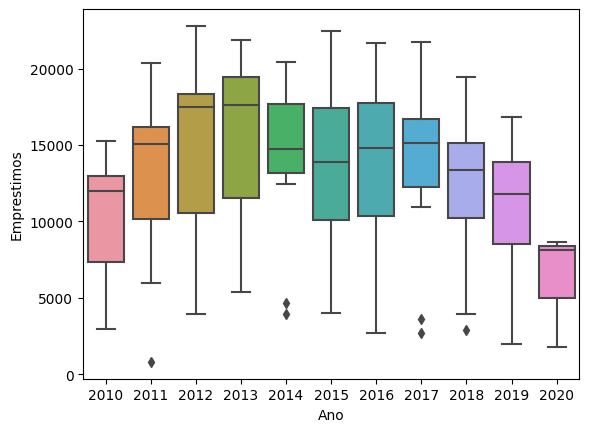

In [13]:
sns.boxplot(x = 'Ano', y = 'Emprestimos', data = graduacao_emprestimos);

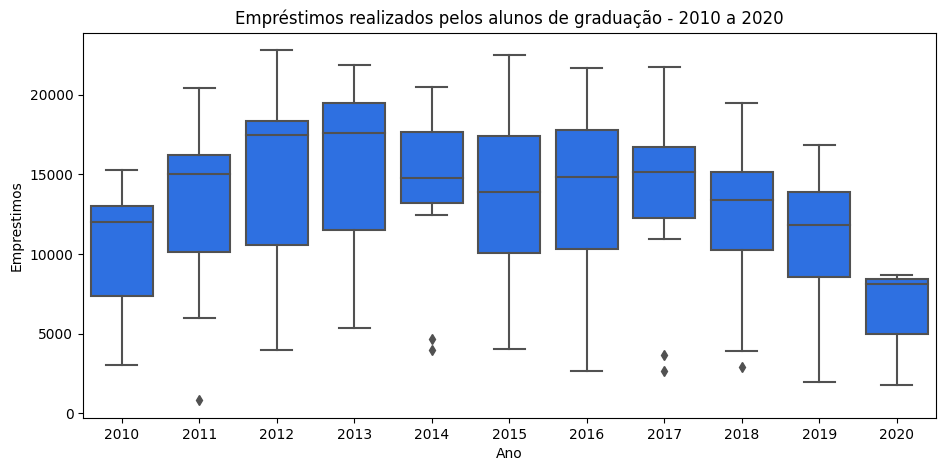

In [15]:
plt.figure(figsize = (11, 5))
ax = sns.boxplot(x = 'Ano', y = 'Emprestimos', data = graduacao_emprestimos, color = '#1068FF')
ax.set_title('Empréstimos realizados pelos alunos de graduação - 2010 a 2020');

# Alunos de pós-graduação

In [16]:
pos = dados.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
pos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
1,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
8,785791,L167050,NaT,2010-06-01 18:41:54.885,2010-07-01 21:19:58.000,2009102346.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
15,880244,L167050,NaT,2010-11-26 19:33:16.188,2010-12-14 18:52:15.000,2014124667.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
22,1041880,L167050,2011-08-21 11:47:13.866,2011-08-08 12:40:38.355,2011-09-05 11:06:34.000,2015102280.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
24,1082240,L167050,2011-10-20 08:58:05.351,2011-09-20 11:44:21.892,2011-11-22 16:36:13.000,2010120605.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


In [17]:
pos.shape

(302541, 13)

In [18]:
pos.colecao.value_counts()

Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: colecao, dtype: int64

## Separando os empréstimos por ano e mês

In [19]:
pos_acervo_circulante = pos.query('colecao == "Acervo Circulante"')
pos_acervo_circulante['Ano'] = pos_acervo_circulante['data_emprestimo'].dt.year
pos_acervo_circulante['Mes'] = pos_acervo_circulante['data_emprestimo'].dt.month
pos_emprestimos_acervo_circulante = pos_acervo_circulante.loc[:, ['Ano', 'Mes']]
pos_emprestimos = pd.DataFrame(data = pos_emprestimos_acervo_circulante.value_counts().reset_index())
pos_emprestimos.rename(columns = {0 : 'Emprestimos'}, inplace = True)
pos_emprestimos

<ipython-input-19-0798d211ed8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_acervo_circulante['Ano'] = pos_acervo_circulante['data_emprestimo'].dt.year
<ipython-input-19-0798d211ed8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_acervo_circulante['Mes'] = pos_acervo_circulante['data_emprestimo'].dt.month


,Ano,Mes,Emprestimos
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


## Box-plot

In [20]:
def plota_boxplot(dataset, x, y, titulo):
  plt.figure(figsize = (11, 5))
  ax = sns.boxplot(x = x, y = y, data = dataset, color = '#1068FF')
  ax.set_title(titulo);

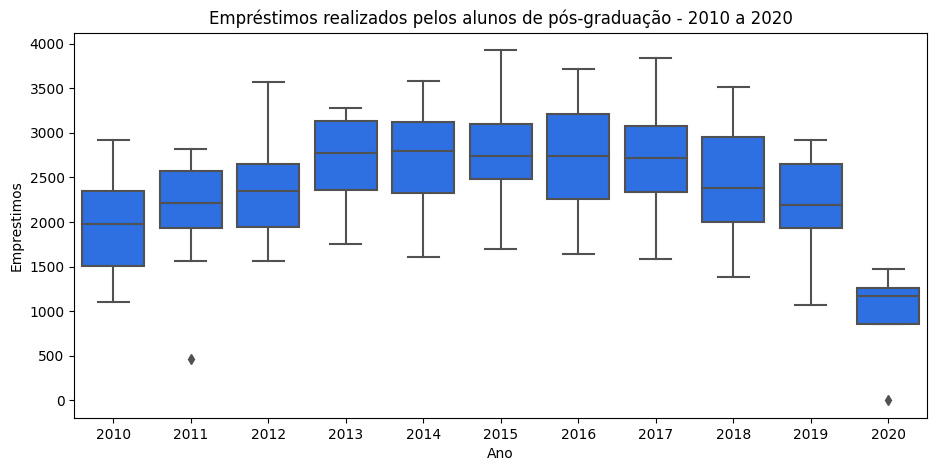

In [22]:
plota_boxplot(pos_emprestimos, 'Ano', 'Emprestimos', 
              'Empréstimos realizados pelos alunos de pós-graduação - 2010 a 2020');